<a href="https://colab.research.google.com/github/Maureen36Mathenge/Football-Match-prediction/blob/master/Moringa_Core_IP_Week_6_Maureen_Mathenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Defining the Question
**a) Specify the Question**

The objective is to determine which team will win based on who is home or away and on whether the game was friendly or not 

**b)Metrics of Success**

Build an accurate model that will predict the outcome of the game.The model making process should avoid underfitting or overfitting   

**c)Context**

 Mchezopesa Ltd needs to understand the outcome of the games in any match given the past data.

**d)Experimental Design**

To successfully achieve a good outcome,i shall identify the business objective and dive in to do the data understanding,preparation,modelling and evaluation






# Import the Libraries

In [0]:
#Import the libraries 
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression

In [51]:
# upload the dataset
df =pd.read_csv("fifa_ranking.csv",parse_dates = ['rank_date'])
df.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


#Understanding the fifa dataset 

In [52]:
#View how many rows and columns are in the dataset
df.shape

#We have 57793 rows and 16 columns 

(57793, 16)

The dataset has 57793 rows and 16 columns 

In [53]:
#check the columns data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
rank                       57793 non-null int64
country_full               57793 non-null object
country_abrv               57793 non-null object
total_points               57793 non-null float64
previous_points            57793 non-null int64
rank_change                57793 non-null int64
cur_year_avg               57793 non-null float64
cur_year_avg_weighted      57793 non-null float64
last_year_avg              57793 non-null float64
last_year_avg_weighted     57793 non-null float64
two_year_ago_avg           57793 non-null float64
two_year_ago_weighted      57793 non-null float64
three_year_ago_avg         57793 non-null float64
three_year_ago_weighted    57793 non-null float64
confederation              57793 non-null object
rank_date                  57793 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(9), int64(3), object(3)
memory usage: 7.1+ MB


The columns consists of 3 integers, 9 float and 4 strings

In [54]:
#Understand each column
df.describe()



,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


#Understanding the "Results" dataset

In [55]:
df1 = pd.read_csv("results.csv",parse_dates = ['date']) 
df1.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [56]:
#View the number of columns and rows available 
df.shape

#it has 57793 rows and 16 columns 

(57793, 16)

This dataset has the same number of rows and columns as the Fifa dataset

In [57]:
#Datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
rank                       57793 non-null int64
country_full               57793 non-null object
country_abrv               57793 non-null object
total_points               57793 non-null float64
previous_points            57793 non-null int64
rank_change                57793 non-null int64
cur_year_avg               57793 non-null float64
cur_year_avg_weighted      57793 non-null float64
last_year_avg              57793 non-null float64
last_year_avg_weighted     57793 non-null float64
two_year_ago_avg           57793 non-null float64
two_year_ago_weighted      57793 non-null float64
three_year_ago_avg         57793 non-null float64
three_year_ago_weighted    57793 non-null float64
confederation              57793 non-null object
rank_date                  57793 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(9), int64(3), object(3)
memory usage: 7.1+ MB


In [58]:
#
df.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


##Convert the rank_date and date in year and month

In [0]:
#create a function that will split the year,month and day
from dateutil import parser
def year_month(df, column):
    df["year"] = df[column].apply(lambda x: x.year)
    df["month"] = df[column].apply(lambda x: x.month)

In [60]:
#Pass the column and the dataframe in the function.
year_month(df, 'rank_date')
df.head()

#This new columns will be used to merge the dataset for consistency

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,year,month
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8


In [61]:
#Pass the column and the dataframe in the function.
year_month(df1, 'date')
df1.head()
#This new columns will be used to merge the dataset for consistency

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,3
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,3
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3


#Merge the datasets

In [62]:
#merge to get the home rank 
fifa_home = pd.merge(df,df1, how='inner', left_on=['country_full','year','month'], right_on = ['home_team','year', 'month'] )
fifa_home.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,year,month,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8,1993-08-11,Sweden,Switzerland,1,2,Friendly,Borås,Sweden,False
1,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8,1993-08-22,Sweden,France,1,1,FIFA World Cup qualification,Solna,Sweden,False
2,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8,1993-08-22,Argentina,Peru,2,1,FIFA World Cup qualification,Buenos Aires,Argentina,False
3,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,Buenos Aires,Argentina,False
4,8,Brazil,BRA,0.0,55,-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False


I have merged to get the home rank. The merge was on home team

In [63]:
#Rename rank to home_rank
fifa_home.rename({'rank' : 'home_rank'}, axis = 1, inplace = True)
fifa_home.head()


,home_rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,year,month,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8,1993-08-11,Sweden,Switzerland,1,2,Friendly,Borås,Sweden,False
1,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8,1993-08-22,Sweden,France,1,1,FIFA World Cup qualification,Solna,Sweden,False
2,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8,1993-08-22,Argentina,Peru,2,1,FIFA World Cup qualification,Buenos Aires,Argentina,False
3,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,Buenos Aires,Argentina,False
4,8,Brazil,BRA,0.0,55,-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False


I renamed the column rank to home rank to avoid any confusion

I went ahead and dropped features that i did not need at all for the model building

In [64]:
final_home = fifa_home.drop([ 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date', 'date', 
       'city', 'country', 'neutral','away_score'],axis=1)
final_home.head()

,home_rank,year,month,home_team,away_team,home_score,tournament
0,4,1993,8,Sweden,Switzerland,1,Friendly
1,4,1993,8,Sweden,France,1,FIFA World Cup qualification
2,5,1993,8,Argentina,Peru,2,FIFA World Cup qualification
3,5,1993,8,Argentina,Paraguay,0,FIFA World Cup qualification
4,8,1993,8,Brazil,Mexico,1,Friendly


I did the same thing again to get the away rank by merging on away team

In [65]:
#Merge on away team to get the away rank
fifa_away= pd.merge(df,df1, how='inner', left_on=['country_full','year','month'], right_on = ['away_team','year', 'month'] )
fifa_away.head()


,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,year,month,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8,1993-08-11,Sweden,Switzerland,1,2,Friendly,Borås,Sweden,False
1,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False
2,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False
3,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,Barranquilla,Colombia,False
4,8,Brazil,BRA,0.0,55,-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8,1993-08-01,Venezuela,Brazil,1,5,FIFA World Cup qualification,San Cristóbal,Venezuela,False


In [66]:
#Rename rank to away_rank
fifa_away.rename({'rank' : 'away_rank'}, axis = 1, inplace = True)
fifa_away.head()

,away_rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,year,month,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8,1993-08-11,Sweden,Switzerland,1,2,Friendly,Borås,Sweden,False
1,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False
2,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False
3,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,Barranquilla,Colombia,False
4,8,Brazil,BRA,0.0,55,-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8,1993-08-01,Venezuela,Brazil,1,5,FIFA World Cup qualification,San Cristóbal,Venezuela,False


In [67]:
#Drop columns that shall not be used
final_away = fifa_away.drop([ 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date', 'date',
       'tournament', 'city', 'country', 'neutral','home_team','home_score'] ,axis=1)
final_away.head()

,away_rank,year,month,away_team,away_score
0,3,1993,8,Switzerland,2
1,5,1993,8,Argentina,1
2,5,1993,8,Argentina,3
3,5,1993,8,Argentina,1
4,8,1993,8,Brazil,5


In [68]:
#Now lets merge the two dataset
#This will give us a complete dataset 
final_final = pd.merge(final_home, final_away, how = 'inner', left_on = ['year', 'month', 'away_team'], right_on = ['year', 'month', 'away_team'])

final_final.head(10)

,home_rank,year,month,home_team,away_team,home_score,tournament,away_rank,away_score
0,4,1993,8,Sweden,Switzerland,1,Friendly,3,2
1,4,1993,8,Sweden,France,1,FIFA World Cup qualification,12,1
2,5,1993,8,Argentina,Peru,2,FIFA World Cup qualification,70,1
3,5,1993,8,Argentina,Peru,2,FIFA World Cup qualification,70,1
4,5,1993,8,Argentina,Peru,2,FIFA World Cup qualification,70,0
5,19,1993,8,Colombia,Peru,4,FIFA World Cup qualification,70,1
6,19,1993,8,Colombia,Peru,4,FIFA World Cup qualification,70,1
7,19,1993,8,Colombia,Peru,4,FIFA World Cup qualification,70,0
8,67,1993,8,Paraguay,Peru,2,FIFA World Cup qualification,70,1
9,67,1993,8,Paraguay,Peru,2,FIFA World Cup qualification,70,1


In [69]:
#Rearrange the columns
football= final_final[['home_team','home_score','away_team','away_score','year','month','home_rank','away_rank','tournament',]]
football.sample(10)

,home_team,home_score,away_team,away_score,year,month,home_rank,away_rank,tournament
26853,Morocco,3,Togo,1,2017,1,57,90,African Cup of Nations
8358,Kuwait,1,Trinidad and Tobago,0,2001,8,76,32,Friendly
21007,Poland,1,Russia,1,2012,6,62,13,UEFA Euro
19374,Colombia,0,Chile,2,2011,3,50,14,Friendly
10226,Niger,1,Guinea,2,2003,6,174,118,African Cup of Nations qualification
4031,Georgia,1,Russia,1,1998,5,52,16,Friendly
19807,United Arab Emirates,3,India,0,2011,7,109,153,FIFA World Cup qualification
15316,New Caledonia,1,Fiji,1,2007,9,124,119,South Pacific Games
7819,Barbados,1,Jamaica,2,2001,5,103,46,CFU Caribbean Cup
979,Czech Republic,3,Netherlands,1,1995,4,30,7,UEFA Euro qualification


#Data Cleaning

##1.Validity

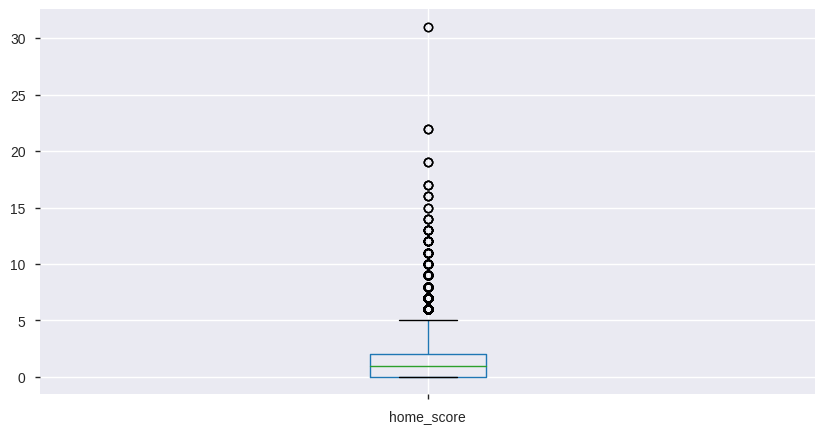

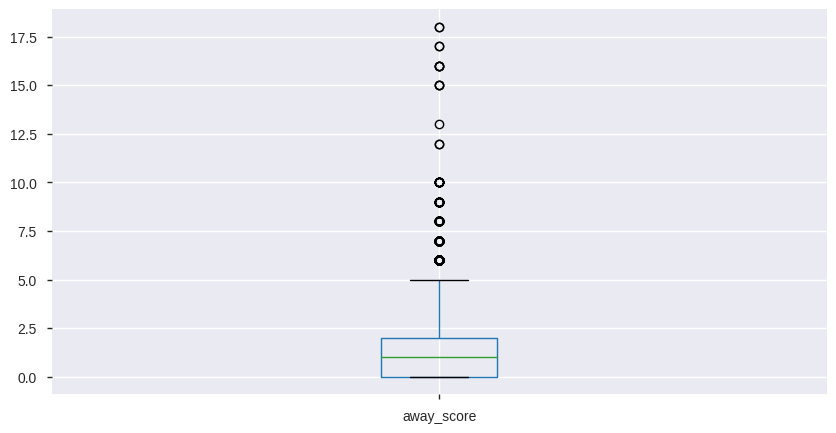

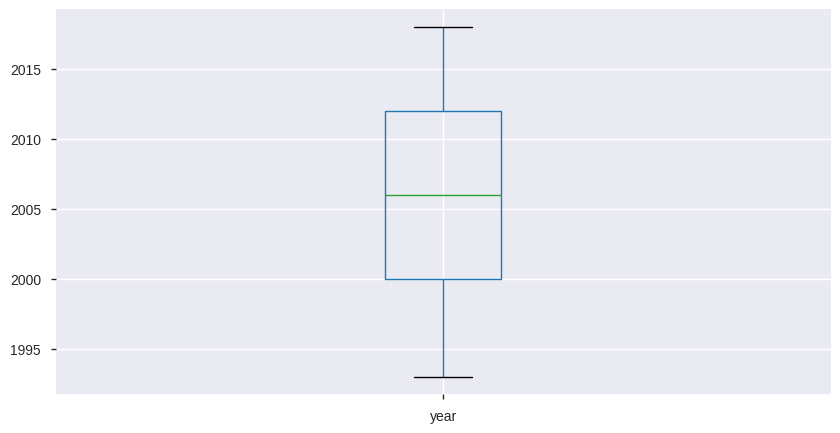

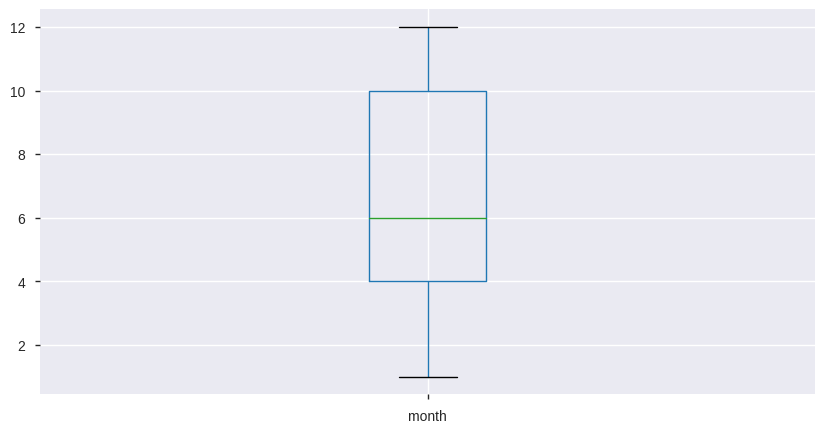

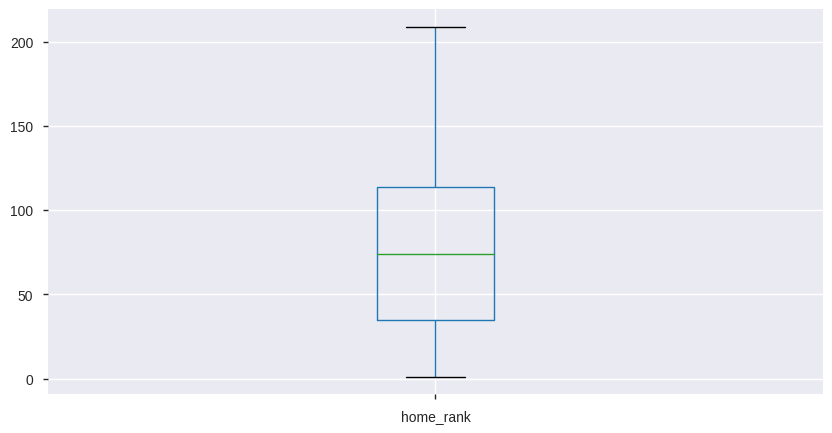

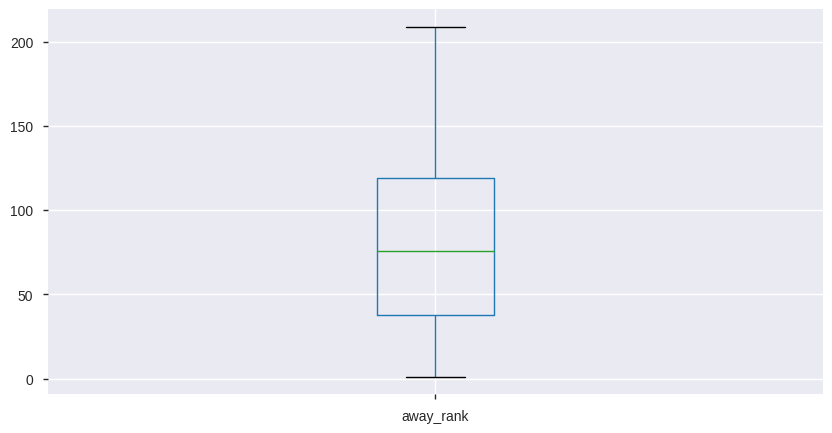

In [70]:
#create a box plot for all columns with numbers 
df_num = football.select_dtypes(include = ['float64','int64']) #create a dataframe with just numbers 
for column in df_num:
    plt.figure(figsize=(10,5))
    df_num.boxplot([column])

There is presence of outliers in the dataset
However,i shall not drop them since since its not unusual for a team to score many goals 

##2.Completeness

In [71]:
#check for missing values 
football.isnull().sum()

home_team     0
home_score    0
away_team     0
away_score    0
year          0
month         0
home_rank     0
away_rank     0
tournament    0
dtype: int64

We do not have missing data from the dataset 

##3.Constistency

In [72]:
#view any duplicates 
football.duplicated().sum()

#We have 4828 duplicates 
#We shall assume them since:
#1. its possible for two teams to have played more than one match during the same year and still had the same scores   

4828

#Feature Engineering 

Determine which team between the home team and away team shall win 
Determine if the home team will the a draw,lose or a win

In [73]:
#We create a new column called goal_difference.
football['goal_difference'] = football['home_score'] - football['away_score']
football.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,home_team,home_score,away_team,away_score,year,month,home_rank,away_rank,tournament,goal_difference
0,Sweden,1,Switzerland,2,1993,8,4,3,Friendly,-1
1,Sweden,1,France,1,1993,8,4,12,FIFA World Cup qualification,0
2,Argentina,2,Peru,1,1993,8,5,70,FIFA World Cup qualification,1
3,Argentina,2,Peru,1,1993,8,5,70,FIFA World Cup qualification,1
4,Argentina,2,Peru,0,1993,8,5,70,FIFA World Cup qualification,2


In [0]:
#Detemine if its a win or loss or draw to the home team
def home_results(x):
  if x > 0:
    return 'W'
  elif x < 0:
    return 'L'
  else:
    return 'D'


In [75]:
# creating a new column to give the match oucome
football['home_results'] = football.goal_difference.apply(lambda x: home_results(x))
football.head()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,home_team,home_score,away_team,away_score,year,month,home_rank,away_rank,tournament,goal_difference,home_results
0,Sweden,1,Switzerland,2,1993,8,4,3,Friendly,-1,L
1,Sweden,1,France,1,1993,8,4,12,FIFA World Cup qualification,0,D
2,Argentina,2,Peru,1,1993,8,5,70,FIFA World Cup qualification,1,W
3,Argentina,2,Peru,1,1993,8,5,70,FIFA World Cup qualification,1,W
4,Argentina,2,Peru,0,1993,8,5,70,FIFA World Cup qualification,2,W


To fit any model,we shall need to label encode the home_results column

In [76]:
# Import label encoder 
from sklearn import preprocessing 
  
label_encoder = preprocessing.LabelEncoder() 
  

football['home_results'] = label_encoder.fit_transform(football['home_results']) 
  
football.head()

#0 is a loss
#1 is a win
#2 is a draw

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,home_team,home_score,away_team,away_score,year,month,home_rank,away_rank,tournament,goal_difference,home_results
0,Sweden,1,Switzerland,2,1993,8,4,3,Friendly,-1,1
1,Sweden,1,France,1,1993,8,4,12,FIFA World Cup qualification,0,0
2,Argentina,2,Peru,1,1993,8,5,70,FIFA World Cup qualification,1,2
3,Argentina,2,Peru,1,1993,8,5,70,FIFA World Cup qualification,1,2
4,Argentina,2,Peru,0,1993,8,5,70,FIFA World Cup qualification,2,2


We now have to determine the type of game that they were playing 

In [0]:
# Get the tournament type

def game (x):
  if x == 'FIFA World Cup':
    return 'FIFA World Cup'
  if x == 'Friendly':
    return 'Friendly'
  else:
    return 'other'


In [78]:
football['tournament_type'] = football.tournament.apply(lambda x: game(x))
football.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,home_team,home_score,away_team,away_score,year,month,home_rank,away_rank,tournament,goal_difference,home_results,tournament_type
0,Sweden,1,Switzerland,2,1993,8,4,3,Friendly,-1,1,Friendly
1,Sweden,1,France,1,1993,8,4,12,FIFA World Cup qualification,0,0,other
2,Argentina,2,Peru,1,1993,8,5,70,FIFA World Cup qualification,1,2,other
3,Argentina,2,Peru,1,1993,8,5,70,FIFA World Cup qualification,1,2,other
4,Argentina,2,Peru,0,1993,8,5,70,FIFA World Cup qualification,2,2,other


In [79]:
# Encode the column "tournament_type"
football['tournament_type'] = label_encoder.fit_transform(football['tournament_type']) 
  
football.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,home_team,home_score,away_team,away_score,year,month,home_rank,away_rank,tournament,goal_difference,home_results,tournament_type
0,Sweden,1,Switzerland,2,1993,8,4,3,Friendly,-1,1,1
1,Sweden,1,France,1,1993,8,4,12,FIFA World Cup qualification,0,0,2
2,Argentina,2,Peru,1,1993,8,5,70,FIFA World Cup qualification,1,2,2
3,Argentina,2,Peru,1,1993,8,5,70,FIFA World Cup qualification,1,2,2
4,Argentina,2,Peru,0,1993,8,5,70,FIFA World Cup qualification,2,2,2


For a friendly game we have 1

For a tournament game we have 0

For any other game,we have 2

#Exploratory Data Analysis

##Univariate Analysis

In [80]:
import pandas_profiling as pp
pp.ProfileReport(football)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,12
Number of observations,28518
Total Missing (%),0.0%
Total size in memory,2.8 MiB
Average record size in memory,104.0 B
Numeric,9
Categorical,3
Boolean,0
Date,0
Text (Unique),0
Rejected,0


We can see that the home team won most of the games 

the games the lost and had a draw are almost the same.The difference is very little 

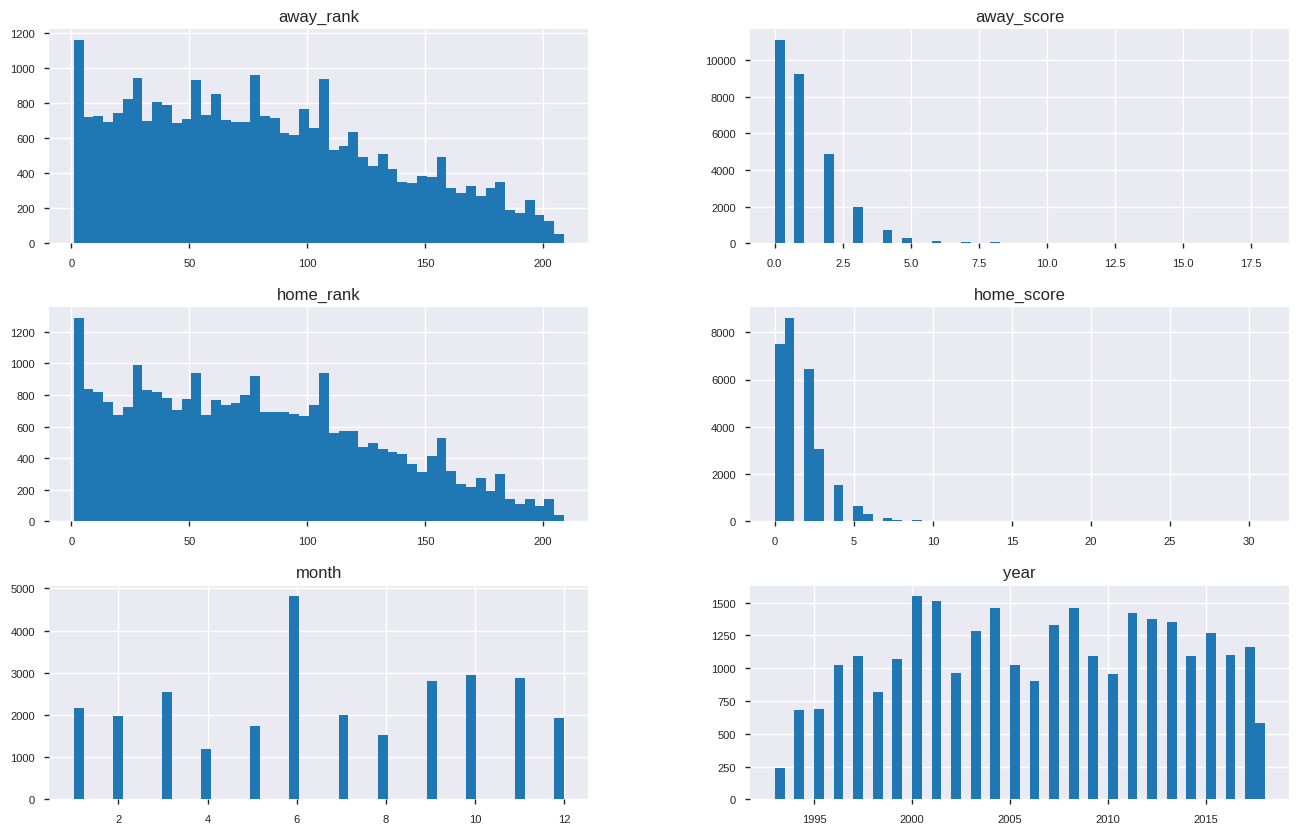

In [81]:
#Analyse all the columns 
df_num.hist(figsize=(16, 10), bins=50, xlabelsize=8, ylabelsize=8);

##Bivariate Analysis

###Numerical and Numerical

                 home_score  away_score  ...  home_results  tournament_type
home_score         1.000000   -0.122204  ...      0.507003         0.063269
away_score        -0.122204    1.000000  ...     -0.231903         0.029231
year              -0.052746   -0.014701  ...     -0.024137        -0.036026
month              0.019208    0.019913  ...      0.013587         0.096903
home_rank         -0.115309    0.136520  ...     -0.101018         0.144464
away_rank          0.307034   -0.139815  ...      0.191125         0.164463
goal_difference    0.809554   -0.681576  ...      0.510965         0.029357
home_results       0.507003   -0.231903  ...      1.000000         0.037203
tournament_type    0.063269    0.029231  ...      0.037203         1.000000

[9 rows x 9 columns]


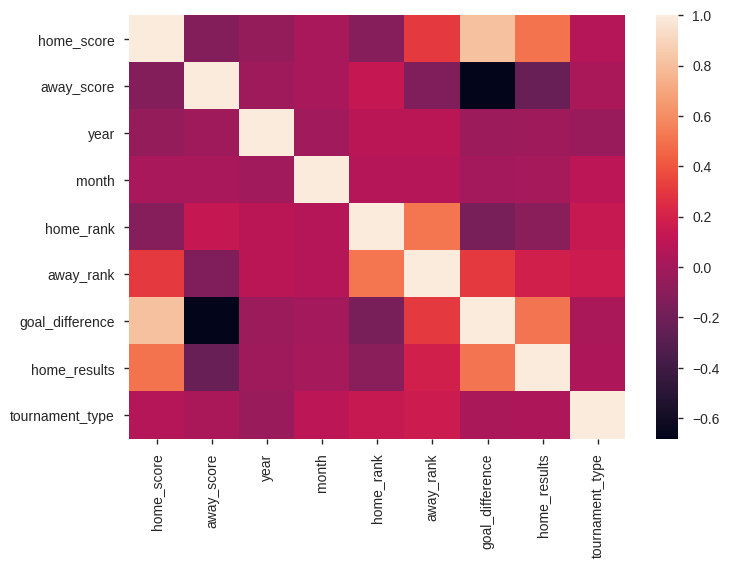

In [82]:
print(football.corr())
sns.heatmap(football.corr())

We have a strong correlation between the home score and home results

THis implies that an increase in one will lead to an increase in another 



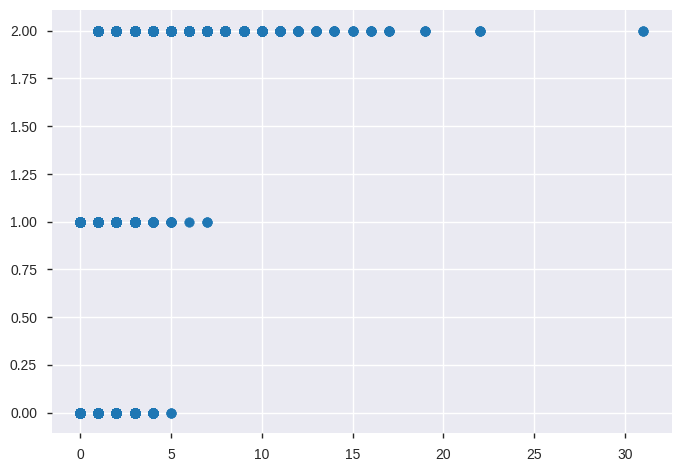

In [83]:
plt.scatter(football["home_score"],football["home_results"])

#Baseline Model: Polynomial Regression

In [0]:
#create the dependent and independent variables 
y = football["home_score"].values.reshape(-1, 1)
X = football[["away_rank","home_rank","tournament_type"]]


In [0]:
# Split the dataset into train and test sets
X_train, y_train, X_test, y_test = train_test_split(X,y, test_size = 0.2, random_state=25)


In [170]:
# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 2) 
X_poly = poly_reg.fit_transform(X)
#Train the model
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [171]:
# Prints y-intercept
print(pol_reg.intercept_)

# Prints the beta coefficients in order
print(pol_reg.coef_)

[1.51151565]
[[ 0.00000000e+00 -3.79084769e-03 -4.64318946e-03  4.93447609e-02
   9.16624655e-05 -6.46306406e-05  4.66193008e-03  1.71638723e-05
  -2.74218584e-03 -3.75397015e-02]]


In [172]:
#predict using the model
g= pol_reg.predict(X_poly)
g

array([[1.49671647],
       [1.49630401],
       [2.22367388],
       ...,
       [2.05127905],
       [1.15030954],
       [1.67285516]])

Logistic Regression

In [0]:
#create the dependent and independent variables 
y = football["home_score"].values.reshape(-1, 1)
X = football[["away_rank","home_rank","tournament_type"]]


In [0]:
#Train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=500)

In [144]:
# Fitting our model
# 
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Using our model to make a prediction
#
y_pred = LogReg.predict(X_test)

In [147]:
#accuracy check for the model
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.34186535764375875

In [148]:
# We will use the rmse score to evaluate 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 1.0679055633473586
Mean Squared Error: 2.7736091631603554
Root Mean Squared Error: 1.6654156127406623


From all the accuracy checks,the model is performing poorly